In [4]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

eth_data = pd.read_csv(r'C:\Users\saart\Desktop\Portfolio\Cryto data\Binance_ETHUSDT_d.csv')
btc_data = pd.read_csv(r'C:\Users\saart\Desktop\Portfolio\Cryto data\Binance_BTCUSDT_d.csv')

bitq_data = wb.DataReader('BITQ',data_source='yahoo',start='2021-05-01',end='2022-01-21')


#Quick check
#eth_data.head()
bitq_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-12,25.129999,23.160,24.540001,23.240000,106900.0,22.605213
2021-05-13,23.510000,20.857,23.030001,21.490000,341000.0,20.903013
2021-05-14,23.400000,22.600,22.930000,23.320000,790800.0,22.683027
2021-05-17,23.600000,21.750,22.500000,22.379999,572700.0,21.768702
2021-05-18,22.980000,22.020,22.280001,22.270000,273200.0,21.661709


In [22]:
#Collecting dates and closing prices from the data
db_eth = eth_data.iloc[:,[1,6]]
db_btc = btc_data.iloc[:,[1,6]]

#Merging all three crypto data on the date
ETHxBTC = pd.merge(db_eth, db_btc, on='date', how='outer')

#Renaming the columns
cols = {'close_x':'ETH','close_y':'BTC'}
ExB = ETHxBTC.rename(columns =cols, inplace= False)

#Setting the index as the date
ExB.set_index('date')

,ETH,BTC
date,,
2022-01-21 00:00:00,2995.99,40710.99
2022-01-20 00:00:00,3001.48,40680.91
2022-01-19 00:00:00,3084.02,41660.01
2022-01-18 00:00:00,3159.85,42352.12
2022-01-17 00:00:00,3209.67,42201.62
...,...,...
21 08 2017,323.29,4016.00
20 08 2017,299.10,4086.29
19 08 2017,290.91,4139.98


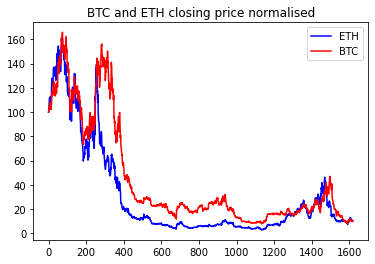

<Figure size 720x360 with 0 Axes>

In [65]:
#Normalised data
x1 = ExB['ETH']/ExB['ETH'].iloc[0]*100
x2 = ExB['BTC']/ExB['BTC'].iloc[0]*100

plt.plot(x1,'-b',label='ETH')
plt.plot(x2,'-r',label='BTC')
plt.title('BTC and ETH closing price normalised')

plt.legend()

plt.figure(figsize=(10,5))

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

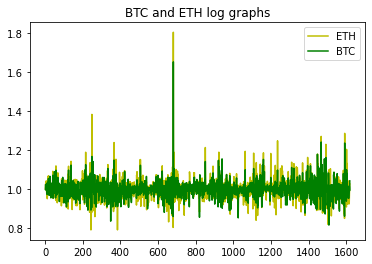

In [66]:
# Log graphs
log_eth = ExB['ETH']/ExB['ETH'].shift(1)
log_btc = ExB['BTC']/ExB['BTC'].shift(1)

plt.plot(log_eth,'-y',label='ETH')
plt.plot(log_btc,'-g',label='BTC')
plt.title('BTC and ETH log graphs')
plt.legend()
plt.show

In [59]:
log_eth.mean()

1.0000793998376218

In [60]:
log_btc.mean()

0.9995366969607314

In [62]:
ExB.corr()

,ETH,BTC
ETH,1.000000,0.921428
BTC,0.921428,1.000000
